In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Gold_Data.csv')

In [4]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,05/19/2023,"1,978.70","1,960.00","1,976.70","1,960.00",0.11K,1.13%
1,05/18/2023,"1,956.50","1,956.80","1,956.80","1,956.80",0.02K,-1.22%
2,05/17/2023,"1,980.70","1,983.60","1,983.60","1,983.60",0.01K,-0.39%
3,05/16/2023,"1,988.40","2,021.30","2,022.70","1,989.10",0.05K,-1.47%
4,05/15/2023,"2,018.00","2,013.80","2,017.10","2,013.80",0.00K,-0.09%
...,...,...,...,...,...,...,...
1291,05/25/2018,"1,303.70","1,304.00","1,307.20","1,299.40",292.91K,-0.05%
1292,05/24/2018,"1,304.40","1,293.30","1,306.40","1,292.20",432.42K,1.15%
1293,05/23/2018,"1,289.60","1,290.60","1,298.40","1,286.70",402.34K,-0.19%
1294,05/22/2018,"1,292.00","1,292.30","1,296.00","1,287.20",291.72K,0.09%


# PREPROCESSING DATA

In [5]:
df = df[['Price']]
# Flip the column
df = df.iloc[::-1]

# Format column Price to float
df['Price'] = df.Price.str.replace(',','').astype(float)

# Drop missing values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

# SPLITTING DATA(7-2-1)

In [6]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# LINEAR REGRESSION

In [7]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [8]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

In [9]:
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [10]:
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2312.31642284 2313.18523598 2314.05404912 2314.92286226 2315.7916754
 2316.66048854 2317.52930168 2318.39811482 2319.26692796 2320.1357411
 2321.00455424 2321.87336738 2322.74218052 2323.61099366 2324.4798068
 2325.34861994 2326.21743308 2327.08624622 2327.95505936 2328.82387249
 2329.69268563 2330.56149877 2331.43031191 2332.29912505 2333.16793819
 2334.03675133 2334.90556447 2335.77437761 2336.64319075 2337.51200389]


In [11]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)


test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  313.8091354601294
Testing MAE:  281.54149078197304
Testing MAPE:  15.993350239584295
Validation RMSE:  358.73883864151134
Validation MAE:  353.6703160268361
Validation MAPE:  18.772025180279577


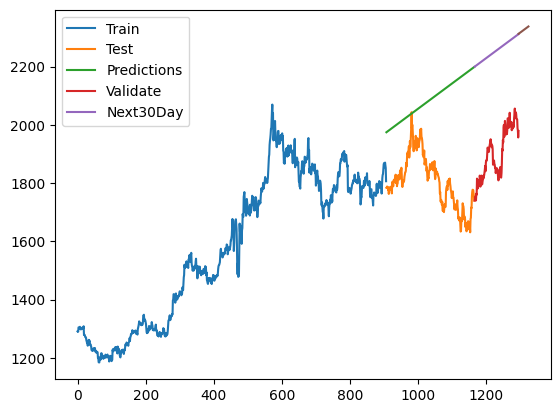

In [12]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [13]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     3059.
Date:                Tue, 13 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:43:46   Log-Likelihood:                -8192.7
No. Observations:                1296   AIC:                         1.639e+04
Df Residuals:                    1294   BIC:                         1.640e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1298.8810      7.481    173.618      0.0

# SPLITTING DATA(6-3-1)

In [14]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [15]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2489.47414802 2490.51747732 2491.56080661 2492.60413591 2493.64746521
 2494.69079451 2495.73412381 2496.7774531  2497.8207824  2498.8641117
 2499.907441   2500.9507703  2501.99409959 2503.03742889 2504.08075819
 2505.12408749 2506.16741679 2507.21074608 2508.25407538 2509.29740468
 2510.34073398 2511.38406328 2512.42739257 2513.47072187 2514.51405117
 2515.55738047 2516.60070977 2517.64403906 2518.68736836 2519.73069766]


In [16]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)


test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  379.9160120477108
Testing MAE:  344.5244563632105
Testing MAPE:  19.40093233544555
Validation RMSE:  523.1448000046901
Validation MAE:  520.1132693114411
Validation MAPE:  27.55014986642626


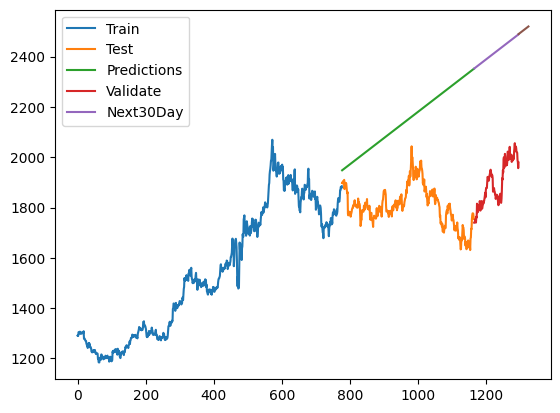

In [17]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [18]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     3059.
Date:                Tue, 13 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:43:46   Log-Likelihood:                -8192.7
No. Observations:                1296   AIC:                         1.639e+04
Df Residuals:                    1294   BIC:                         1.640e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1298.8810      7.481    173.618      0.0

# SPLITTING DATA(5-3-2)

In [19]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [20]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2675.53926364 2676.75887381 2677.97848399 2679.19809417 2680.41770435
 2681.63731453 2682.85692471 2684.07653489 2685.29614507 2686.51575525
 2687.73536543 2688.95497561 2690.17458579 2691.39419597 2692.61380615
 2693.83341633 2695.05302651 2696.27263668 2697.49224686 2698.71185704
 2699.93146722 2701.1510774  2702.37068758 2703.59029776 2704.80990794
 2706.02951812 2707.2491283  2708.46873848 2709.68834866 2710.90795884]


In [21]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  322.4642010671828
Testing MAE:  295.83535084647906
Testing MAPE:  16.254308882406356
Validation RMSE:  697.7433194779945
Validation MAE:  692.7978275350579
Validation MAPE:  38.28793504460559


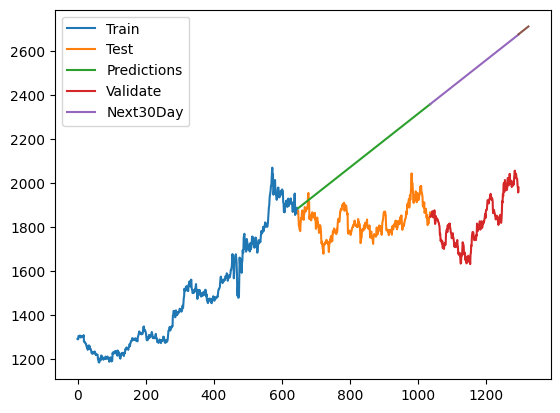

In [22]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [23]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     3059.
Date:                Tue, 13 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:43:47   Log-Likelihood:                -8192.7
No. Observations:                1296   AIC:                         1.639e+04
Df Residuals:                    1294   BIC:                         1.640e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1298.8810      7.481    173.618      0.0

# EVALUATING MODEL

---
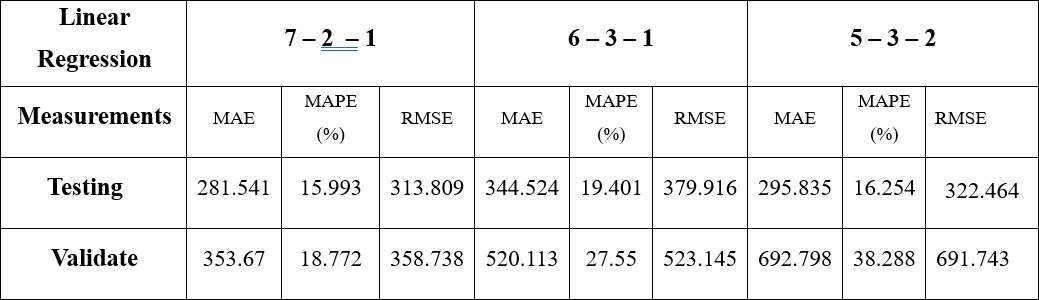